In [71]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import time
from collections import Counter
warnings.filterwarnings("ignore")


plt.style.use("fivethirtyeight")

sns.set_style({'font.sans-serif': ['simsun', 'Arial']})
sns.set_style('darkgrid', {'font.sans-serif': ['simhei', 'Arial']})
%matplotlib inline

# 专利.xlsx

In [2]:
df_zhuanli = pd.read_excel(r'../../Data/CompInfo/专利.xlsx')
# df_zhuanli_copy = df_zhuanli.copy()

In [3]:
df_zhuanli_bkp = df_zhuanli.copy()
df_zhuanli.info()
display(df_zhuanli.head(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980360 entries, 0 to 980359
Data columns (total 4 columns):
企业编号     980360 non-null int64
专利类型     980360 non-null object
授权公告日    980360 non-null object
申请日      980360 non-null object
dtypes: int64(1), object(3)
memory usage: 29.9+ MB


,企业编号,专利类型,授权公告日,申请日
0,1001,发明公布,2006-09-08­,2008-03-12
1,1001,发明公布,2006-06-23­,2007-12-26
2,1001,发明公布,2006-06-23,2007-12-26
3,1001,发明公布,2006-09-08,2008-03-12
4,1002,实用新型,2010-09-26,2011-10-26


* 授权公告日是指专利部门作出授予专利权的决定，发给专利证书，同时予以登记和公告的日子。专利权自公告之日起生效。

## 专利类型
统计每个公司的每个专利数量

In [4]:
df_zhuanli = df_zhuanli_bkp.copy()

In [5]:
df_zhuanli['专利类型'].value_counts()

发明公布      404207
实用新型      300250
发明授权      170671
外观设计      104337
发明公布更正       652
发明专利         107
实用新型更正        68
外观设计更正        38
发明授权更正        30
Name: 专利类型, dtype: int64

In [6]:
df_zhuanli['专利类型'] = df_zhuanli['专利类型'].str.replace('更正', '', regex=True)
df_zhuanli['专利类型'].value_counts()

发明公布    404859
实用新型    300318
发明授权    170701
外观设计    104375
发明专利       107
Name: 专利类型, dtype: int64

## 时间处理

In [7]:
# df_zhuanli=df_zhuanli_bkp.copy()
df_zhuanli['授权公告日'] = df_zhuanli['授权公告日'].str.replace(
    r'[^0-9\-]', '', regex=True)
df_zhuanli['申请日'] = df_zhuanli['申请日'].str.replace(r'[^0-9\-]', '', regex=True)

df_zhuanli['授权公告日'] = pd.to_datetime(df_zhuanli['授权公告日'])
df_zhuanli['申请日'] = pd.to_datetime(df_zhuanli['申请日'])

# df_zhuanli['专利申请时间差'] = df_zhuanli['申请日'].sub(
#     df_zhuanli['授权公告日'], axis=0).dt.days
# df_zhuanli = df_zhuanli.drop(columns=['授权公告日', '申请日'])
# display(df_zhuanli.head(n=5))

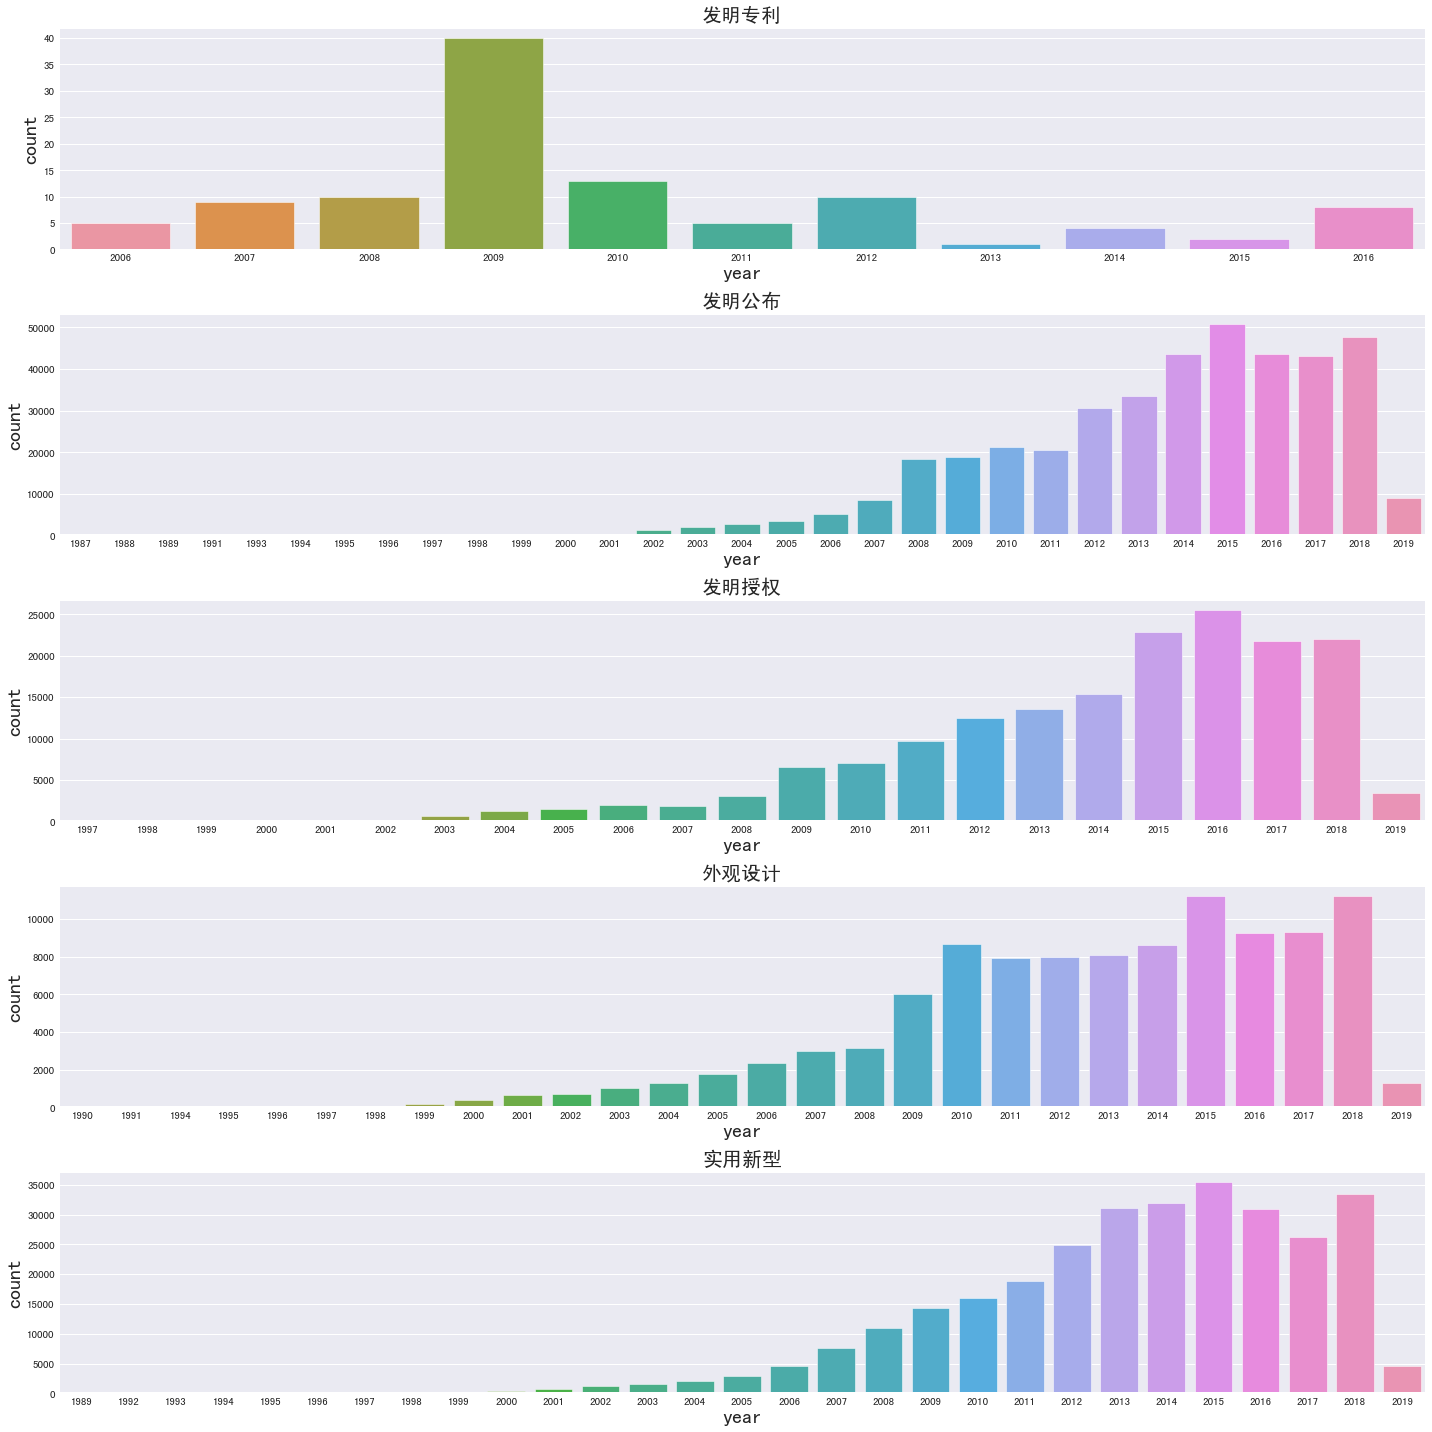

In [72]:
titles = ['发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
fig, axlist = plt.subplots(5, 1, figsize=(20, 20))

for ax, title in zip(axlist, titles):
    tmp_df = pd.DataFrame()
    tmp_df['year'] = list(pd.DatetimeIndex(
        df_zhuanli.loc[(df_zhuanli['专利类型'] == title), '申请日']).year)
    sns.countplot(data=tmp_df, x='year', ax=ax)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('year', fontsize=20)
    ax.set_ylabel('count', fontsize=20)

fig.tight_layout()

In [108]:
# titles = ['发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
tmp1 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明专利')]
tmp1 = tmp1.loc[(abs(tmp1['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp2 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明公布')]
tmp2 = tmp2.loc[(abs(tmp2['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp3 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明授权')]
tmp3 = tmp3.loc[(abs(tmp3['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp4 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '外观设计')]
tmp4 = tmp4.loc[(abs(tmp4['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 10]

tmp5 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '实用新型')]
tmp5 = tmp5.loc[(abs(tmp5['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 10]

filter_df_zhuanli = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5])
# df_zhuanli.loc[list((subdate) <= 5)]

In [109]:
filter_df_zhuanli=filter_df_zhuanli.drop(columns=['授权公告日', '申请日'])
new_df_zhuanli = filter_df_zhuanli.groupby(
    ['企业编号', '专利类型'])['专利类型'].count().unstack()
new_df_zhuanli.head(n=5)

专利类型,发明专利,发明公布,发明授权,外观设计,实用新型
企业编号,,,,,
1001,NaN,4.0,NaN,NaN,NaN
1002,NaN,1.0,NaN,NaN,1.0
1003,NaN,141.0,61.0,469.0,956.0
1004,NaN,1.0,NaN,5.0,1.0
1005,NaN,6.0,2.0,NaN,6.0


In [110]:
# new_df_zhuanli = df_zhuanli.groupby(['企业编号', '专利类型'])['专利类型'].count().unstack()
# new_df_zhuanli.columns = ['发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
new_df_zhuanli['企业编号'] = new_df_zhuanli.index
columns = ['企业编号', '发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
new_df_zhuanli = pd.DataFrame(new_df_zhuanli, columns=columns)
new_df_zhuanli = new_df_zhuanli.set_index(np.arange(0, len(new_df_zhuanli)))
new_df_zhuanli.head(n=5)

,企业编号,发明专利,发明公布,发明授权,外观设计,实用新型
0,1001,NaN,4.0,NaN,NaN,NaN
1,1002,NaN,1.0,NaN,NaN,1.0
2,1003,NaN,141.0,61.0,469.0,956.0
3,1004,NaN,1.0,NaN,5.0,1.0
4,1005,NaN,6.0,2.0,NaN,6.0


In [111]:
for c in ['发明专利',
          '发明公布',
          '发明授权',
          '外观设计',
          '实用新型']:
    new_df_zhuanli.loc[(new_df_zhuanli[c].isnull() == True), c] = 0
    new_df_zhuanli[c] = new_df_zhuanli[c].astype(int)
display(new_df_zhuanli.head(n=5))

,企业编号,发明专利,发明公布,发明授权,外观设计,实用新型
0,1001,0,4,0,0,0
1,1002,0,1,0,0,1
2,1003,0,141,61,469,956
3,1004,0,1,0,5,1
4,1005,0,6,2,0,6


In [112]:
new_df_zhuanli.to_excel(r'./专利（清洗）.xlsx', index=False)
len(new_df_zhuanli)

1816

In [87]:
# filter_df_zhuanli = df_zhuanli.loc[(abs(df_zhuanli['申请日'].sub(pd.to_datetime(
#     time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 5]
# df_zhuanli.loc[(abs(df_zhuanli['申请日'].sub(pd.to_datetime(
#     time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 5]
# len(filter_df_zhuanli)

,企业编号,专利类型,授权公告日,申请日
6,1003,实用新型,2014-11-28,2015-04-22
9,1003,实用新型,2013-12-30,2014-06-18
18,1003,实用新型,2013-12-31,2014-06-18
20,1003,实用新型,2013-12-31,2014-06-18
38,1003,实用新型,2016-08-12,2017-01-18
43,1003,实用新型,2014-07-25,2015-02-18
44,1003,外观设计,2014-07-18,2014-12-10
45,1003,发明授权,2013-12-16,2016-04-27
46,1003,发明授权,2013-01-04,2015-09-23
47,1003,实用新型,2017-11-16,2018-06-15


In [32]:
# new_df_zhuanli = df_zhuanli.groupby(['企业编号', '专利类型']).agg(
#     {'专利类型': 'count', '专利申请时间差': ['mean', 'std']}).unstack()
# new_df_zhuanli.columns = ["_".join(x) for x in new_df_zhuanli.columns.ravel()]
# new_df_zhuanli['企业编号'] = new_df_zhuanli.index
# columns = ['企业编号',
#            '专利类型_count_发明专利',
#            '专利类型_count_发明公布',
#            '专利类型_count_发明授权',
#            '专利类型_count_外观设计',
#            '专利类型_count_实用新型',
#            '专利申请时间差_mean_发明专利',
#            '专利申请时间差_mean_发明公布',
#            '专利申请时间差_mean_发明授权',
#            '专利申请时间差_mean_外观设计',
#            '专利申请时间差_mean_实用新型',
#            '专利申请时间差_std_发明专利',
#            '专利申请时间差_std_发明公布',
#            '专利申请时间差_std_发明授权',
#            '专利申请时间差_std_外观设计',
#            '专利申请时间差_std_实用新型']
# new_df_zhuanli = pd.DataFrame(new_df_zhuanli, columns=columns)
# new_df_zhuanli = new_df_zhuanli.set_index(np.arange(0, len(new_df_zhuanli)))
# display(new_df_zhuanli.head(n=5))

,企业编号,专利类型_count_发明专利,专利类型_count_发明公布,专利类型_count_发明授权,专利类型_count_外观设计,专利类型_count_实用新型,专利申请时间差_mean_发明专利,专利申请时间差_mean_发明公布,专利申请时间差_mean_发明授权,专利申请时间差_mean_外观设计,专利申请时间差_mean_实用新型,专利申请时间差_std_发明专利,专利申请时间差_std_发明公布,专利申请时间差_std_发明授权,专利申请时间差_std_外观设计,专利申请时间差_std_实用新型
0,1001,NaN,4.0,NaN,NaN,NaN,NaN,551.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1002,NaN,1.0,NaN,NaN,1.0,NaN,159.000000,NaN,NaN,395.000000,NaN,NaN,NaN,NaN,NaN
2,1003,NaN,141.0,61.0,524.0,987.0,NaN,236.198582,764.95082,194.299618,214.126646,NaN,186.918211,213.41395,77.800082,68.021736
3,1004,NaN,1.0,NaN,5.0,1.0,NaN,219.000000,NaN,161.800000,349.000000,NaN,NaN,NaN,13.461055,NaN
4,1005,NaN,6.0,2.0,NaN,6.0,NaN,412.666667,622.00000,NaN,176.333333,NaN,249.936525,0.00000,NaN,14.109099


In [33]:
# for c in ['专利类型_count_发明专利',
#           '专利类型_count_发明公布',
#           '专利类型_count_发明授权',
#           '专利类型_count_外观设计',
#           '专利类型_count_实用新型']:
#     new_df_zhuanli.loc[(new_df_zhuanli[c].isnull() == True), c] = 0
#     new_df_zhuanli[c] = new_df_zhuanli[c].astype(int)
# display(new_df_zhuanli.head(n=5))

,企业编号,专利类型_count_发明专利,专利类型_count_发明公布,专利类型_count_发明授权,专利类型_count_外观设计,专利类型_count_实用新型,专利申请时间差_mean_发明专利,专利申请时间差_mean_发明公布,专利申请时间差_mean_发明授权,专利申请时间差_mean_外观设计,专利申请时间差_mean_实用新型,专利申请时间差_std_发明专利,专利申请时间差_std_发明公布,专利申请时间差_std_发明授权,专利申请时间差_std_外观设计,专利申请时间差_std_实用新型
0,1001,0,4,0,0,0,NaN,551.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1002,0,1,0,0,1,NaN,159.000000,NaN,NaN,395.000000,NaN,NaN,NaN,NaN,NaN
2,1003,0,141,61,524,987,NaN,236.198582,764.95082,194.299618,214.126646,NaN,186.918211,213.41395,77.800082,68.021736
3,1004,0,1,0,5,1,NaN,219.000000,NaN,161.800000,349.000000,NaN,NaN,NaN,13.461055,NaN
4,1005,0,6,2,0,6,NaN,412.666667,622.00000,NaN,176.333333,NaN,249.936525,0.00000,NaN,14.109099
